# This Notebook is based on the article What it Takes to be Correlated
https://towardsdatascience.com/what-it-takes-to-be-correlated-ce41ad0d8d7f

In [2]:
import numpy as np
# ^^^ pyforest auto-imports - don't write above this line
#Importing the important module
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Load the dataset
tips = sns.load_dataset('tips')

#Creating new category based on the tip feature (0: tip below 3 and 1 tip equal or more than 3)
tips['tip_category'] = tips['tip'].apply(lambda x: 1 if x>3 else 0)

tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_category
0,16.99,1.01,Female,No,Sun,Dinner,2,0
1,10.34,1.66,Male,No,Sun,Dinner,3,0
2,21.01,3.50,Male,No,Sun,Dinner,3,1
3,23.68,3.31,Male,No,Sun,Dinner,2,1
4,24.59,3.61,Female,No,Sun,Dinner,4,1


## Pearson Correlation

Pearson Correlation is one of the most used correlations during the data analysis process. Pearson correlation measures the linear relationship between variable continuous X and variable continuous Y and has a value between 1 and -1. In other words, the Pearson Correlation Coefficient measures the relationship between 2 variables via a line.

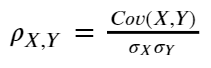

In [3]:
#Using the .corr method from pandas, default is Pearson Corellation 
tips[['total_bill', 'tip']].corr()

,total_bill,tip
total_bill,1.000000,0.675734
tip,0.675734,1.000000


## Spearman Correlation

Unlike the Pearson Correlation Coefficient, Spearman Rank Correlation measures the monotonic relationship (Strictly increase or decrease, not both) between two variables and measured by the rank order of the values. The correlation still measured between continuous variable X and continuous variable Y, although the Spearman Rank Correlation method still relevant to the discrete ordinal variable.

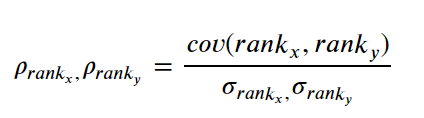

In [5]:
tips[['total_bill', 'tip']].corr('spearman')

,total_bill,tip
total_bill,1.000000,0.678968
tip,0.678968,1.000000


## Kendall Tau Rank Correlation

Another way to measure the non-linear relationship between variables is by applying Kendall’s Tau Rank Correlation. Kendall Tau rank correlation coefficient measures the degree of similarity between two sets of ranks given to the same set of objects. However, unlike Spearman’s coefficient, Kendall Tau only measures directional agreement, not the rank differences. Therefore, this coefficient is more appropriate for discrete data. 

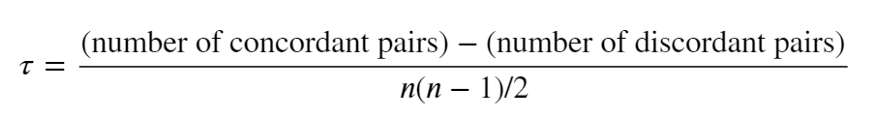

In [6]:
tips[['size', 'tip_category']].corr('kendall')

,size,tip_category
size,1.000000,0.352836
tip_category,0.352836,1.000000


## Cramers_V

Cramer’s V is a measure of association between two discrete variables. The measurement is based on the Pearson chi-square statistic and has an output range between 0 to 1; The closer the value to 0 means less association between the two variables and 1 means strong association between the two variables. There is no negative (-) value as an output because there is no such thing as a negative association.

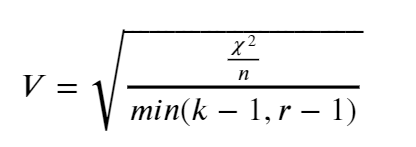

In [14]:
# !pip install researchpy #only if you never have this module before
from researchpy import crosstab
cross, res = crosstab(tips['sex'], tips['size'], test = 'chi-square')
res

,Chi-square test,results
0,Pearson Chi-square ( 5.0) =,5.8437
1,p-value =,0.3217
2,Cramer's V =,0.1548


In [15]:
#bias-corrected Cramer’s V function
def cramers_v(x, y):
    import scipy.stats as ss
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))


cramers_v(tips['sex'], tips['size'])

<IPython.core.display.Javascript object>

0.058202656344848294

## Hypothesis Correlation Testing with Scipy

Where the first number represent the Correlation Coefficient and the second number represent the p-value.

In [9]:
from scipy.stats import pearsonr, spearmanr
pearsonr(tips['total_bill'], tips['tip'])

(0.6757341092113645, 6.692470646863477e-34)

In [8]:
spearmanr(tips['total_bill'], tips['tip'])

SpearmanrResult(correlation=0.6789681219001009, pvalue=2.501158440923619e-34)

In [10]:
from scipy.stats import kendalltau
kendalltau(tips['size'], tips['tip_category'])

KendalltauResult(correlation=0.3528363722264162, pvalue=6.456364135002584e-09)